In [1]:
import torch
import torch.autograd as autograd         # computation graph
from torch import Tensor                  # tensor node in the computation graph
import torch.nn as nn                     # neural networks
import torch.optim as optim               # optimizers e.g. gradient descent, ADAM, etc.

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker
from torch.nn.parameter import Parameter

import numpy as np
import time
from pyDOE import lhs         #Latin Hypercube Sampling
import scipy.io

from smt.sampling_methods import LHS
from scipy.io import savemat

#Set default dtype to float32
torch.set_default_dtype(torch.float)

#PyTorch random number generator
torch.manual_seed(1234)

# Random number generators in other libraries
np.random.seed(1234)

device = torch.device('cpu')

print(device)

if device == 'cuda': 
    print(torch.cuda.get_device_name())

cpu


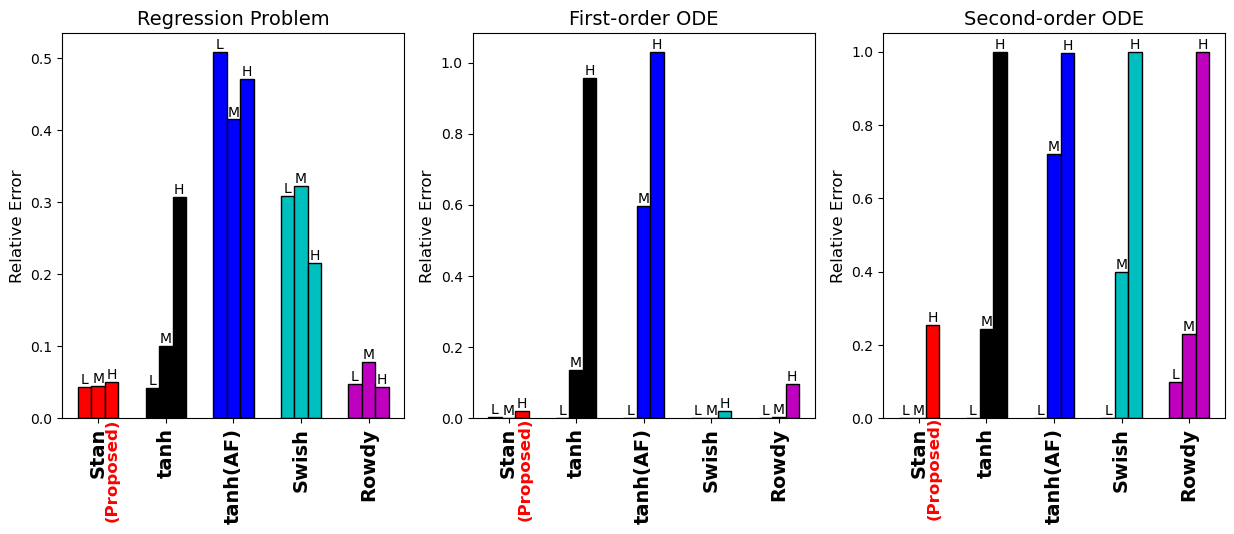

In [11]:
folder_base = './1D/FODE_mod/'

fig, axs = plt.subplots(1,3)
ax = axs[1]

num_steps = 200
prob_name = "1D_FODE_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','tanh(AF)','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']

stop = -5

tick_locs = np.zeros((5,))
for i in range(5):
    mean_test_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_loss =  dat['test_re_loss']
        
        mean_test_loss[j] = np.nanmean(test_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    locs = np.linspace(start,stop,3)
    
    tick_locs[i] = start+1
    bar = ax.bar(locs,mean_test_loss,width = 1.0,color = all_colors[i],edgecolor = "black")
    ax.bar_label(bar,labels = ['L','M','H'],fontsize=10)
ax.set_xticks(tick_locs)
ax.set_xticklabels(all_labels,rotation = 90,fontsize = 14,fontweight='extra bold')
# # ax.set_ylim([0,1.1])
# ax.set_yscale('log')
ax.text(tick_locs[0]+0.65,-0.28,'(Proposed)',rotation = 90,fontsize = 12,color = 'r',fontweight='extra bold')
ax.set_title('First-order ODE', fontsize=14)
ax.set_ylabel('Relative Error',fontsize=12,alpha = 1)
# ax.set_aspect(10)
ax.figure.set_size_inches(21, 5)
# fig.savefig(prob_name+'re_bar.eps', format='eps', bbox_inches='tight')
# fig.savefig(prob_name+'re_bar.pdf', format='pdf', bbox_inches='tight')
#-----------------------------------------------------------------------
folder_base = './1D/SODE/'

ax = axs[2]
num_steps = 200
prob_name = "1D_SODE_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','tanh(AF)','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']

stop = -5

tick_locs = np.zeros((5,))
for i in range(5):
    mean_test_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_loss =  dat['test_re_loss']
        
        mean_test_loss[j] = np.nanmean(test_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    locs = np.linspace(start,stop,3)
    
    tick_locs[i] = start+1
    bar = ax.bar(locs,mean_test_loss,width = 1.0,color = all_colors[i],edgecolor = "black")
    ax.bar_label(bar,labels = ['L','M','H'],fontsize=10)
ax.set_xticks(tick_locs)
ax.set_xticklabels(all_labels,rotation = 90,fontsize = 14,fontweight='extra bold')
ax.text(tick_locs[0]+0.6,-0.27,'(Proposed)',rotation = 90,fontsize = 12,color = 'r',fontweight='extra bold')
# # ax.set_ylim([0,1.1])
# ax.set_yscale('log')
ax.set_title('Second-order ODE', fontsize=14)
ax.set_ylabel('Relative Error',fontsize=12,alpha = 1)
ax.figure.set_size_inches(21, 5)


# fig.savefig(prob_name+'re_bar.eps', format='eps', bbox_inches='tight')
# fig.savefig(prob_name+'re_bar.pdf', format='pdf', bbox_inches='tight')
#---------------------------------------------------------------------
folder_base = './Regression/'

ax = axs[0]

num_steps = 3000
prob_name = "Regr_disc_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','tanh(AF)','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['./stan/','./tanh/','./atanh/','./swish/','./rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']

stop = -5

tick_locs = np.zeros((5,))
for i in range(5):
    mean_test_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_loss =  dat['test_re']
        
        mean_test_loss[j] = np.nanmean(test_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    locs = np.linspace(start,stop,3)
    
    tick_locs[i] = start+1
    bar = ax.bar(locs,mean_test_loss,width = 1.0,color = all_colors[i],edgecolor = "black")
    ax.bar_label(bar,labels = ['L','M','H'],fontsize=10)
ax.set_xticks(tick_locs)
ax.set_xticklabels(all_labels,rotation = 90,fontsize = 14,fontweight='extra bold')
# # ax.set_ylim([0,1.1])
# ax.set_yscale('log')
ax.text(tick_locs[0]+0.5,-0.14,'(Proposed)',rotation = 90,fontsize = 12,color = 'r',fontweight='extra bold')
ax.set_title('Regression Problem', fontsize=14)
ax.set_ylabel('Relative Error',fontsize=12,alpha = 1)

ax.figure.set_size_inches(15, 5)


# fig.savefig('Numerical_re_bars.png', format='png', bbox_inches='tight')
# fig.savefig('Numerical_re_bars.eps', format='eps', bbox_inches='tight')
# fig.savefig('Numerical_re_bars.pdf', format='pdf', bbox_inches='tight')
fig.savefig('Numerical_re_bars.svg', format='svg', bbox_inches='tight')


In [3]:
folder_base = './1D/FODE_mod/'

num_steps = 200
prob_name = "1D_FODE_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','N-LAAF','tanhALR','tanhAW','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','tanh/','atanh/','tanh ALR/','tanh AW/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','tanhALR','tanhAW','swish','rowdy']

stop = -5


for i in range(7):
    mean_test_re_loss = np.zeros((3,))
    mean_test_mse_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_re_loss =  dat['test_re_loss']
        test_mse_loss =  dat['test_mse_loss']
        
        mean_test_re_loss[j] = np.nanmean(test_re_loss[:,-1],axis = 0)
        mean_test_mse_loss[j] = np.nanmean(test_mse_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    print(prob_name + all_labels[i],'MSE',mean_test_mse_loss)
    print(prob_name + all_labels[i],'RE',mean_test_re_loss)
    print("\n")

1D_FODE_Stan MSE [8.75234217e-07 1.14067074e-03 2.27106941e+03]
1D_FODE_Stan RE [0.00245851 0.00026108 0.02039167]


1D_FODE_tanh MSE [1.43380948e-08 4.76397965e+02 4.62045463e+06]
1D_FODE_tanh RE [3.08091091e-04 1.36435582e-01 9.58016189e-01]


1D_FODE_N-LAAF MSE [1.23330450e-08 3.04205759e+03 5.32325116e+06]
1D_FODE_N-LAAF RE [2.54848149e-04 5.97421414e-01 1.03115140e+00]


1D_FODE_tanhALR MSE [5.44762290e-09 1.01883519e+03 4.48449060e+06]
1D_FODE_tanhALR RE [1.78125754e-04 2.15734541e-01 9.44920412e-01]


1D_FODE_tanhAW MSE [1.00815422e-07 5.10349127e+04 9.42106349e+06]
1D_FODE_tanhAW RE [8.77156760e-04 2.14607271e+00 1.35218695e+00]


1D_FODE_Swish MSE [3.38738643e-08 1.70055561e-04 2.03875752e+03]
1D_FODE_Swish RE [4.91300429e-04 8.95433297e-05 1.96506321e-02]


1D_FODE_Rowdy MSE [6.91291254e-08 1.03462545e+00 1.23030173e+05]
1D_FODE_Rowdy RE [0.00066962 0.0044437  0.09634665]




In [13]:
folder_base = './1D/SODE/'

num_steps = 200
prob_name = "1D_SODE_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','N-LAAF','tanhALR','tanhAW','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','tanh/','atanh/','tanh ALR/','tanh AW/','swish/','rowdy/']
algo_names = ['Stan','tanh','atanh','tanhALR','tanhAW','swish','rowdy']

stop = -5


for i in range(7):
    mean_test_re_loss = np.zeros((3,))
    mean_test_mse_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_re_loss =  dat['test_re_loss']
        test_mse_loss =  dat['test_mse_loss']
        
        mean_test_re_loss[j] = np.nanmean(test_re_loss[:,-1],axis = 0)
        mean_test_mse_loss[j] = np.nanmean(test_mse_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    print(prob_name + all_labels[i],'MSE',mean_test_mse_loss)
    print(prob_name + all_labels[i],'RE',mean_test_re_loss)
    print("\n")

1D_SODE_Stan MSE [8.11896155e-07 2.21725100e-03 2.90608267e+03]
1D_SODE_Stan RE [1.87028075e-04 1.77199412e-03 2.54248762e-01]


1D_SODE_tanh MSE [3.51506696e-06 6.58409408e+01 5.95460802e+05]
1D_SODE_tanh RE [3.90939249e-04 2.53960295e-01 9.99999546e-01]


1D_SODE_N-LAAF MSE [2.67685662e-05 3.49435899e+02 1.41574514e+04]
1D_SODE_N-LAAF RE [0.00110812 0.95200583 0.99639706]


1D_SODE_tanhALR MSE [3.59225726e-07 3.83515086e+02 1.42576618e+04]
1D_SODE_tanhALR RE [1.40772862e-04 9.98282976e-01 9.99976325e-01]


1D_SODE_tanhAW MSE [5.09171136e-07 3.72110053e+02 1.42593298e+04]
1D_SODE_tanhAW RE [1.63545120e-04 9.82252082e-01 1.00003481e+00]


1D_SODE_Swish MSE [3.49584134e-06 1.53492724e+02 1.42576240e+04]
1D_SODE_Swish RE [4.43255746e-04 3.99813381e-01 9.99974998e-01]


1D_SODE_Rowdy MSE [1.37385343e+00 6.07269575e+01 1.42616212e+04]
1D_SODE_Rowdy RE [0.09817253 0.23501761 1.00011513]




In [20]:
folder_base = './Regression/'

num_steps = 200
prob_name = "Regr_disc_"

levels = ["_low","_medium","_high"]
all_labels = ['Stan','tanh','N-LAAF','Swish','Rowdy']
all_colors = ['r','k','b','c','m']

folders = ['stan/','tanh/','atanh/','swish/','rowdy/']
algo_names = ['stan','tanh','atanh','swish','rowdy']

stop = -5


for i in range(5):
    mean_test_re_loss = np.zeros((3,))
    mean_test_mse_loss = np.zeros((3,))
    
    for j in range(3):
        level = levels[j]
        
        dat = scipy.io.loadmat(folder_base + folders[i]+prob_name+algo_names[i]+level+'.mat')
        test_re_loss =  dat['test_re']
        test_mse_loss =  dat['test_mse']
        
        mean_test_re_loss[j] = np.nanmean(test_re_loss[:,-1],axis = 0)
        mean_test_mse_loss[j] = np.nanmean(test_mse_loss[:,-1],axis = 0)
    
    
    start = stop + 3
    stop = start + 2
    print(prob_name + all_labels[i],'MSE',mean_test_mse_loss)
    print(prob_name + all_labels[i],'RE',mean_test_re_loss)
    print("\n")

Regr_disc_Stan MSE [2.42768055e-01 3.23242879e+01 6.79554428e+02]
Regr_disc_Stan RE [0.04381801 0.04836216 0.04738594]


Regr_disc_tanh MSE [3.39259941e-01 1.69131632e+02 2.74588128e+04]
Regr_disc_tanh RE [0.05006128 0.10502268 0.31433966]


Regr_disc_N-LAAF MSE [3.34330750e+01 2.18721936e+03 6.97638340e+04]
Regr_disc_N-LAAF RE [0.51235668 0.41459605 0.47163553]


Regr_disc_Swish MSE [1.92362665e+01 1.96633757e+03 2.34402874e+04]
Regr_disc_Swish RE [0.32516065 0.32513267 0.2222497 ]


Regr_disc_Rowdy MSE [5.14109503e-01 4.72990072e+01 7.45800503e+02]
Regr_disc_Rowdy RE [0.05980949 0.05649926 0.04819799]


